# Project \#2. “Why did I get the flu?”. Deep sequencing, error control, p-value, viral evolution..

# Lab Notebook


## 1. Inspect the data from your roommate

In [ ]:
!wget http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR170/001/SRR1705851/SRR1705851.fastq.gz

--2022-11-11 14:16:19--  http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR170/001/SRR1705851/SRR1705851.fastq.gz
Resolving ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)... 193.62.193.138
Connecting to ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)|193.62.193.138|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19217176 (18M) [application/x-gzip]
Saving to: ‘SRR1705851.fastq.gz’

SRR1705851.fastq.gz 100%[===================>]  18.33M  2.49MB/s    in 8.2s    

2022-11-11 14:16:28 (2.23 MB/s) - ‘SRR1705851.fastq.gz’ saved [19217176/19217176]



In [ ]:
!gzip -d SRR1705851.fastq.gz

## 2. Align your roommate’s data to the reference sequence

In [ ]:
!pip install biopython 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.6 MB 8.0 MB/s 


In [ ]:
import Bio

In [ ]:
# we can download fasta sequence using buopython

from Bio import SeqIO, Entrez
#Setting up your email to be able to use Entrez
Entrez.email = 'anna.chechenina@alum.esci.upf.edu'
#Here, we set up a temporary handle with our downloaded sequence in fasta format
temp = Entrez.efetch(db="nucleotide", rettype="fasta", id="KF848938.1")
#Creating a fasta file to write our downloaded sequence
aaseq_out = open("KF848938.1.fasta",'w')
#Reading the sequence information as a string in fasta format
aaseq = SeqIO.read(temp, format="fasta")
#Writing the sequence record in fasta format
SeqIO.write(aaseq,aaseq_out,"fasta")
#Closing both the temp handle and the FASTA file
temp.close()
aaseq_out.close()

In [ ]:
# for Anastasia only - otherwise simply download the file
!cp /content/drive/MyDrive/BIOINF/Practice/Project_2/KF848938.1.fasta /content/KF848938.1.fasta

cp: cannot stat '/content/drive/MyDrive/BIOINF/Practice/Project_2/KF848938.1.fasta': No such file or directory


In [ ]:
!apt-get install bwa

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
Suggested packages:
  samtools
The following NEW packages will be installed:
  bwa
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 176 kB of archives.
After this operation, 404 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 bwa amd64 0.7.17-1ubuntu0.1 [176 kB]
Fetched 176 kB in 1s (216 kB/s)
Selecting previously unselected package bwa.
(Reading database ... 123942 files and directories currently installed.)
Preparing to unpack .../bwa_0.7.17-1ubuntu0.1_amd64.deb ...
Unpacking bwa (0.7.17-1ubuntu0.1) ...
Setting up bwa (0.7.17-1ubuntu0.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
!bwa index /content/KF848938.1.fasta

[bwa_index] Pack FASTA... 0.00 sec
[bwa_index] Construct BWT for the packed sequence...
[bwa_index] 0.00 seconds elapse.
[bwa_index] Update BWT... 0.00 sec
[bwa_index] Pack forward-only FASTA... 0.00 sec
[bwa_index] Construct SA from BWT and Occ... 0.00 sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa index /content/KF848938.1.fasta
[main] Real time: 0.047 sec; CPU: 0.015 sec


In [ ]:
!apt-get install -y samtools

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  cwltool libc-ares2 libhts2 libjs-bootstrap nodejs nodejs-doc
  python-asn1crypto python-avro python-cachecontrol python-certifi
  python-cffi-backend python-chardet python-cryptography python-enum34
  python-html5lib python-idna python-ipaddress python-isodate python-lockfile
  python-mistune python-openssl python-pkg-resources python-pyparsing
  python-rdflib python-rdflib-jsonld python-requests python-ruamel.yaml
  python-schema-salad python-shellescape python-six python-sparqlwrapper
  python-typing python-urllib3 python-webencodings
Suggested packages:
  python-cryptography-doc python-cryptography-vectors python-enum34-doc
  python-genshi python-lxml python-lockfile-doc python-openssl-doc
  python-ope

In [ ]:
!bwa mem KF848938.1.fasta SRR1705851.fastq > res.sam 

[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 68388 sequences (10000129 bp)...
[M::process] read 67628 sequences (10000233 bp)...
[M::mem_process_seqs] Processed 68388 reads in 2.439 CPU sec, 2.388 real sec
[M::process] read 67698 sequences (10000046 bp)...
[M::mem_process_seqs] Processed 67628 reads in 1.855 CPU sec, 1.698 real sec
[M::process] read 67652 sequences (10000169 bp)...
[M::mem_process_seqs] Processed 67698 reads in 2.551 CPU sec, 2.403 real sec
[M::process] read 68072 sequences (10000295 bp)...
[M::mem_process_seqs] Processed 67652 reads in 2.484 CPU sec, 2.333 real sec
[M::process] read 18827 sequences (2716992 bp)...
[M::mem_process_seqs] Processed 68072 reads in 2.054 CPU sec, 1.948 real sec
[M::mem_process_seqs] Processed 18827 reads in 0.997 CPU sec, 0.925 real sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa mem KF848938.1.fasta SRR1705851.fastq
[main] Real time: 12.041 sec; CPU: 12.471 sec


In [ ]:
!samtools view -S -b res.sam > res.bam

In [ ]:
!samtools flagstat res.bam

361349 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 secondary
3084 + 0 supplementary
0 + 0 duplicates
361116 + 0 mapped (99.94% : N/A)
0 + 0 paired in sequencing
0 + 0 read1
0 + 0 read2
0 + 0 properly paired (N/A : N/A)
0 + 0 with itself and mate mapped
0 + 0 singletons (N/A : N/A)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)


In [ ]:
!samtools sort res.bam > res.sorted.bam

In [ ]:
!samtools index res.sorted.bam

## 3. Look for common variants with VarScan

In [ ]:
!samtools mpileup -f /content/KF848938.1.fasta res.sorted.bam -d 361349 >  my.mpileup # -d max depth = number of reads

[mpileup] 1 samples in 1 input files


In [ ]:
!wget https://downloads.sourceforge.net/project/varscan/VarScan.v2.3.9.jar

--2022-11-11 14:18:17--  https://downloads.sourceforge.net/project/varscan/VarScan.v2.3.9.jar
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Connecting to downloads.sourceforge.net (downloads.sourceforge.net)|204.68.111.105|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://gigenet.dl.sourceforge.net/project/varscan/VarScan.v2.3.9.jar [following]
--2022-11-11 14:18:17--  https://gigenet.dl.sourceforge.net/project/varscan/VarScan.v2.3.9.jar
Resolving gigenet.dl.sourceforge.net (gigenet.dl.sourceforge.net)... 69.65.16.142
Connecting to gigenet.dl.sourceforge.net (gigenet.dl.sourceforge.net)|69.65.16.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 111413 (109K) [application/java-archive]
Saving to: ‘VarScan.v2.3.9.jar’

VarScan.v2.3.9.jar  100%[===================>] 108.80K   546KB/s    in 0.2s    

2022-11-11 14:18:17 (546 KB/s) - ‘VarScan.v2.3.9.jar’ saved [111413/111413]



In [ ]:
!java -jar VarScan.v2.3.9.jar

VarScan v2.3

USAGE: java -jar VarScan.jar [COMMAND] [OPTIONS] 

COMMANDS:
	pileup2snp		Identify SNPs from a pileup file
	pileup2indel		Identify indels a pileup file
	pileup2cns		Call consensus and variants from a pileup file
	mpileup2snp		Identify SNPs from an mpileup file
	mpileup2indel		Identify indels an mpileup file
	mpileup2cns		Call consensus and variants from an mpileup file

	somatic			Call germline/somatic variants from tumor-normal pileups
	copynumber			Determine relative tumor copy number from tumor-normal pileups
	readcounts		Obtain read counts for a list of variants from a pileup file

	filter			Filter SNPs by coverage, frequency, p-value, etc.
	somaticFilter		Filter somatic variants for clusters/indels
	fpfilter		Apply the false-positive filter

	processSomatic		Isolate Germline/LOH/Somatic calls from output
	copyCaller		GC-adjust and process copy number changes from VarScan copynumber output
	compare			Compare two lists of positions/variants
	limit			Restrict pileup/snp

In [ ]:
!java -jar VarScan.v2.3.9.jar  mpileup2snp my.mpileup --min-var-freq 0.95 --variants --output-vcf 1 > VarScan_results_1.vcf

Only SNPs will be reported
Min coverage:	8
Min reads2:	2
Min var freq:	0.95
Min avg qual:	15
P-value thresh:	0.01
Reading input from my.mpileup
1665 bases in pileup file
5 variant positions (5 SNP, 0 indel)
0 were failed by the strand-filter
5 variant positions reported (5 SNP, 0 indel)


5 variants were reported.

In [ ]:
!cat VarScan_results_1.vcf | awk 'NR>24 {print $1, $2, $4, $5}'

KF848938.1 72 A G
KF848938.1 117 C T
KF848938.1 774 T C
KF848938.1 999 C T
KF848938.1 1260 A C


We use a .gff3 file, corresponding to the reference sequence, to observe amino acid annotattation in IGV.

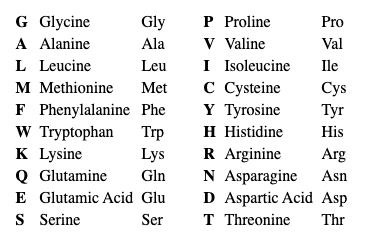

**72**: in the reference we have amino T = Thr = ACA, but mutated is ACG = still Thr, so nothing changed.

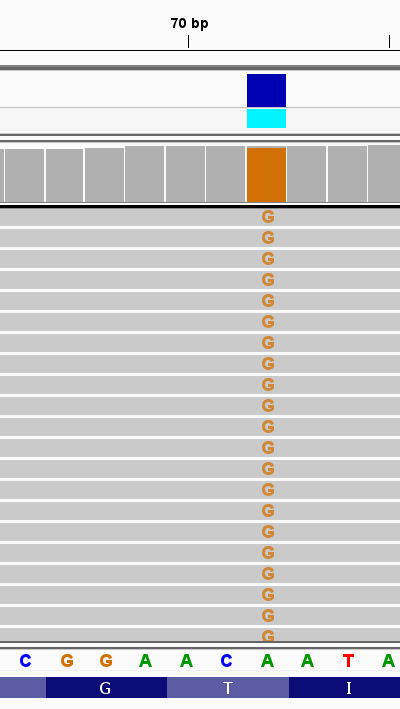

**117**: in the reference sequence there is A = Ala = GCC, but in the mutation there is GCT = GCU = Ala still, so nothing new.

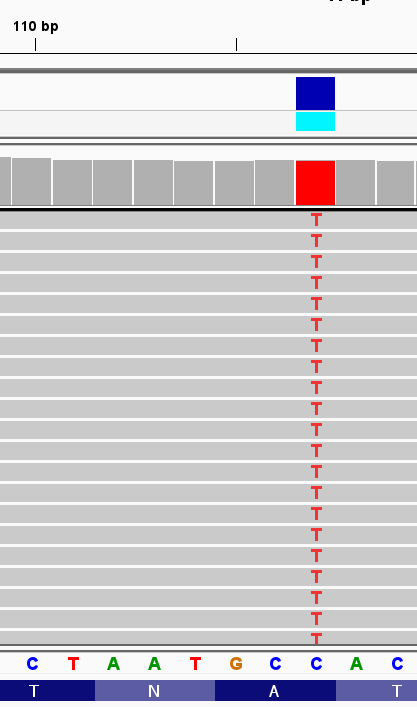

**774**: in the reference sequence we have F = Phe = UUU = TTT, but due to the mutation we now have TTC = UUC, which is still Phe, so this one does not affect the protein.

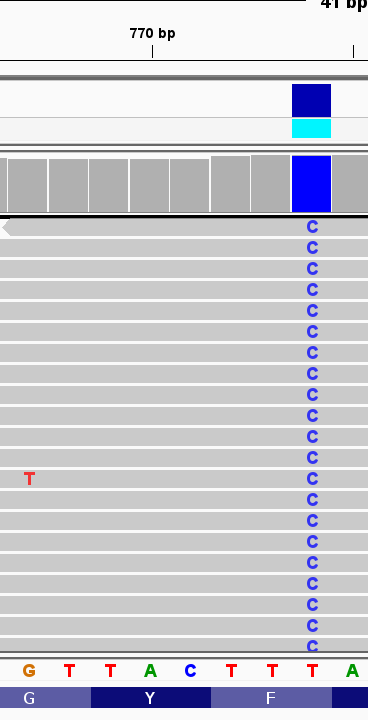

**999**: in reference: GGC = G = Gly, mutated: GGT = GGU = Gly - same

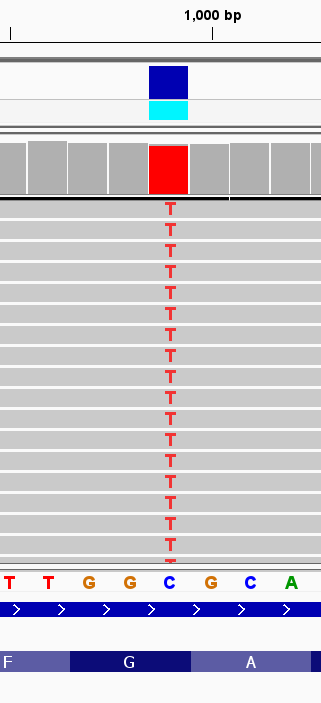

**1260**: in reference: CTA = L = Leu, mutated: CTC = CUC = Leu also

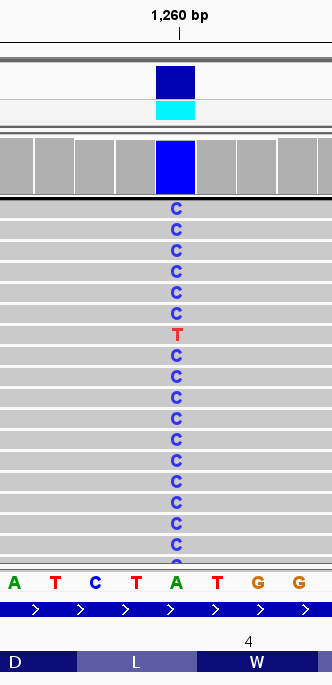

Overall, it can be concluded, that none of the detected mutations actually affect the protein itself as all the aminos stay the same.

## 4. Look for rare variants with VarScan

In [ ]:
!java -jar VarScan.v2.3.9.jar  mpileup2snp my.mpileup --min-var-freq 0.001 --variants --output-vcf 1 > VarScan_results_2.vcf

Only SNPs will be reported
Min coverage:	8
Min reads2:	2
Min var freq:	0.001
Min avg qual:	15
P-value thresh:	0.01
Reading input from my.mpileup
1665 bases in pileup file
23 variant positions (21 SNP, 2 indel)
0 were failed by the strand-filter
21 variant positions reported (21 SNP, 0 indel)


We now have 21 variants.

In [ ]:
!cat VarScan_results_2.vcf | awk 'NR>24 {print $1, $2, $4, $5, $10}'

KF848938.1 72 A G 1/1:255:16832:16794:6:16787:99.96%:0E0:35:36:4:2:10898:5889
KF848938.1 117 C T 1/1:255:20768:20663:36:20625:99.82%:0E0:35:37:27:9:13462:7163
KF848938.1 254 A G 0/1:20:35781:35626:35562:59:0.17%:8.5683E-3:36:36:23919:11643:37:22
KF848938.1 276 A G 0/1:24:37022:36965:36892:64:0.17%:3.3004E-3:37:35:22579:14313:30:34
KF848938.1 307 C T 0/1:255:37506:37386:37029:351:0.94%:6.9068E-66:36:35:22400:14629:184:167
KF848938.1 340 T C 0/1:23:37973:37793:37723:64:0.17%:4.6441E-3:37:36:23413:14310:40:24
KF848938.1 389 T C 0/1:40:31960:31763:31690:69:0.22%:9.0525E-5:37:36:16067:15623:44:25
KF848938.1 691 A G 0/1:23:39503:39319:39245:67:0.17%:4.1867E-3:37:34:21313:17932:23:44
KF848938.1 722 A G 0/1:36:38090:38036:37954:76:0.2%:2.353E-4:37:36:21003:16951:39:37
KF848938.1 744 A G 0/1:23:38443:38380:38306:65:0.17%:5.0068E-3:37:33:20859:17447:35:30
KF848938.1 774 T C 1/1:255:38397:38191:8:38177:99.96%:0E0:32:37:7:1:19806:18371
KF848938.1 802 A G 0/1:59:44236:44106:44001:101:0.23%:1.2224E-

In [ ]:
!cat VarScan_results_2.vcf | awk 'NR>24 {print $1, $2, $4, $5, $10}' > diff_roommate_ref_vcf.txt

It can be seen that some frequences are extremely high (around 99%), while others are extremely low, less than 1%.

## 5. Inspect and align the control sample sequencing data

In [ ]:
!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR170/008/SRR1705858/SRR1705858.fastq.gz 
!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR170/009/SRR1705859/SRR1705859.fastq.gz 
!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR170/000/SRR1705860/SRR1705860.fastq.gz 

--2022-11-11 14:18:59--  ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR170/008/SRR1705858/SRR1705858.fastq.gz
           => ‘SRR1705858.fastq.gz’
Resolving ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)... 193.62.193.138
Connecting to ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)|193.62.193.138|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /vol1/fastq/SRR170/008/SRR1705858 ... done.
==> SIZE SRR1705858.fastq.gz ... 14782243
==> PASV ... done.    ==> RETR SRR1705858.fastq.gz ... done.
Length: 14782243 (14M) (unauthoritative)

SRR1705858.fastq.gz 100%[===================>]  14.10M  8.35MB/s    in 1.7s    

2022-11-11 14:19:02 (8.35 MB/s) - ‘SRR1705858.fastq.gz’ saved [14782243]

--2022-11-11 14:19:03--  ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR170/009/SRR1705859/SRR1705859.fastq.gz
           => ‘SRR1705859.fastq.gz’
Resolving ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)... 193.62.193.138
Connecting to ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk

In [ ]:
# unziping
!gzip -d /content/SRR1705858.fastq.gz  /content/SRR1705859.fastq.gz  /content/SRR1705860.fastq.gz 

In [ ]:
!head -20 SRR1705858.fastq

@SRR1705858.1 1/1
GTGCCCAAGGCACAGCGTTGCCGTGCTGTTGTCATTTCCAGGAAGTTTTTGAGCGAAAACCAGACATAGAATGTAGCTCAAAGCAATGATAGTCTTCATGGTTAATAG
+
????<<<?AB<BBB?BA,@>CC>6+@CEHHHEC9AEDGB?AC,AC8EGHFAEFGE=EEEHH@F@EE-C=FGBGG?AF?ABEHHHHFFFDGBGH.7CCB?.C.@FD@D7
@SRR1705858.2 2/1
TATTAACCATGAAGACTATCATTGCTTTGAGCTACATTCTATGTCTGGTTTTCGCTCAAAAACTTCCTGGAAATGACAACAGCACGGCAACGCTGTGCCTTGGGCACCATGCAGTGCCAAACGGAACAATAGTGAAAACAATCACGAATGA
+
AAAAABBBDEDDDDDEGGGGGGIIIIIIHIIIIIIIIIHIIIIIIIIIHHIIIHHHIHIIIIHIIIIIIIIIIIIIIIIIIIIIIHHHHHIHHHHHHHHHHHHHHHHHHHHHHGGGGGGGGGGGGGGGEGGGEGEGGGGGGGGGGGGGGGG
@SRR1705858.3 3/1
GGCACAGCGTTGCCGTGCTGTTGTCATTTCCAGGAAGTTTTTGAGCGAAAACCAGACATAGAATGTAGCTCAAAGCAATGATAGTCTTCATGGTTAATAG
+
???AABB?DDDDDDDDFEFFFFIFHIIIIFGHIHIIIGHIIIHDFGHHHHHHHIHFFHIHFIIHHIIIIIIIIIIHHHIIIHHHFCGHHHHHHHFFHHHF
@SRR1705858.4 4/1
TATTAACCATGAAGACTATCATTGCTTTGAGCTACATTCTATGTCTGGTTTTCGCTCAAAAACTTCCTGGAAATGACAACAGCACGGCAACGCTGTGCCTTGGGCACCATGCAGTGCCAAACGGAACAATAGTGAAAACAATCACGAATGA
+
?????BBBBDBDDDBBFFFFFFHCHHHHHFD=AEGEFHGHHHHH

In [ ]:
!wc -l SRR1705858.fastq

1026344 SRR1705858.fastq


In [ ]:
print(f"There are {1026344/4} reads in the SRR1705858.fastq file")

There are 256586.0 reads in the SRR1705858.fastq file


In [ ]:
!wc -l SRR1705859.fastq

933308 SRR1705859.fastq


In [ ]:
print(f"There are {933308/4} reads in the SRR1705859.fastq file")

There are 233327.0 reads in the SRR1705859.fastq file


In [ ]:
!wc -l SRR1705860.fastq

999856 SRR1705860.fastq


In [ ]:
print(f"There are {999856/4} reads in the SRR1705860.fastq file")

There are 249964.0 reads in the SRR1705860.fastq file


In [ ]:
with open("/content/KF848938.1.fasta","r") as f:
    print(sum([len(line)-1 for line in f.readlines()[1:]]))

1665


So if we have 1665 positions in total and if we assume that the reads will distribute equally along the reference genome, we will have roughly 150 reads per position.

#### Alingnment of the _58 file:

In [ ]:
!bwa mem KF848938.1.fasta SRR1705858.fastq > res58.sam 
!samtools view -S -b res58.sam > res58.bam
!samtools flagstat res58.bam
!samtools sort res58.bam > res58.sorted.bam
!samtools index res58.sorted.bam

[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 67448 sequences (10000210 bp)...
[M::process] read 67230 sequences (10000094 bp)...
[M::mem_process_seqs] Processed 67448 reads in 1.707 CPU sec, 1.645 real sec
[M::process] read 67100 sequences (10000113 bp)...
[M::mem_process_seqs] Processed 67230 reads in 1.970 CPU sec, 1.830 real sec
[M::process] read 54808 sequences (8118313 bp)...
[M::mem_process_seqs] Processed 67100 reads in 1.932 CPU sec, 1.797 real sec
[M::mem_process_seqs] Processed 54808 reads in 1.597 CPU sec, 1.535 real sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa mem KF848938.1.fasta SRR1705858.fastq
[main] Real time: 7.344 sec; CPU: 7.324 sec
256744 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 secondary
158 + 0 supplementary
0 + 0 duplicates
256658 + 0 mapped (99.97% : N/A)
0 + 0 paired in sequencing
0 + 0 read1
0 + 0 read2
0 + 0 properly paired (N/A : N/A)
0 + 0 with itself and mate mapped
0 + 0 singletons (N/A : N/A)
0 + 0 with mate mapped 

#### Alingnment of the _59 file:

In [ ]:
!bwa mem KF848938.1.fasta SRR1705859.fastq > res59.sam 
!samtools view -S -b res59.sam > res59.bam
!samtools flagstat res59.bam
!samtools sort res59.bam > res59.sorted.bam
!samtools index res59.sorted.bam

[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 67476 sequences (10000274 bp)...
[M::process] read 67236 sequences (10000039 bp)...
[M::mem_process_seqs] Processed 67476 reads in 1.689 CPU sec, 1.627 real sec
[M::process] read 67216 sequences (10000283 bp)...
[M::mem_process_seqs] Processed 67236 reads in 1.963 CPU sec, 1.799 real sec
[M::process] read 31399 sequences (4635971 bp)...
[M::mem_process_seqs] Processed 67216 reads in 1.849 CPU sec, 1.722 real sec
[M::mem_process_seqs] Processed 31399 reads in 1.057 CPU sec, 0.969 real sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa mem KF848938.1.fasta SRR1705859.fastq
[main] Real time: 6.582 sec; CPU: 6.666 sec
233451 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 secondary
124 + 0 supplementary
0 + 0 duplicates
233375 + 0 mapped (99.97% : N/A)
0 + 0 paired in sequencing
0 + 0 read1
0 + 0 read2
0 + 0 properly paired (N/A : N/A)
0 + 0 with itself and mate mapped
0 + 0 singletons (N/A : N/A)
0 + 0 with mate mapped 

#### Alingnment of the _60 file:

In [ ]:
!bwa mem KF848938.1.fasta SRR1705860.fastq > res60.sam 
!samtools view -S -b res60.sam > res60.bam
!samtools flagstat res60.bam
!samtools sort res60.bam > res60.sorted.bam
!samtools index res60.sorted.bam

[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 67356 sequences (10000126 bp)...
[M::process] read 67208 sequences (10000122 bp)...
[M::mem_process_seqs] Processed 67356 reads in 1.713 CPU sec, 1.651 real sec
[M::process] read 67010 sequences (10000072 bp)...
[M::mem_process_seqs] Processed 67208 reads in 1.932 CPU sec, 1.784 real sec
[M::process] read 48390 sequences (7170166 bp)...
[M::mem_process_seqs] Processed 67010 reads in 1.868 CPU sec, 1.728 real sec
[M::mem_process_seqs] Processed 48390 reads in 1.460 CPU sec, 1.379 real sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa mem KF848938.1.fasta SRR1705860.fastq
[main] Real time: 6.891 sec; CPU: 7.092 sec
250184 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 secondary
220 + 0 supplementary
0 + 0 duplicates
250108 + 0 mapped (99.97% : N/A)
0 + 0 paired in sequencing
0 + 0 read1
0 + 0 read2
0 + 0 properly paired (N/A : N/A)
0 + 0 with itself and mate mapped
0 + 0 singletons (N/A : N/A)
0 + 0 with mate mapped 

## 6. Use VarScan to look for rare variants in the reference files.

For the _58 file:

In [ ]:
!samtools mpileup -f /content/KF848938.1.fasta res58.sorted.bam -d 256700 >  my.mpileup
!java -jar VarScan.v2.3.9.jar  mpileup2snp my.mpileup --min-var-freq 0.001 --variants --output-vcf 1 > VarScan_results_58.vcf

[mpileup] 1 samples in 1 input files
Only SNPs will be reported
Min coverage:	8
Min reads2:	2
Min var freq:	0.001
Min avg qual:	15
P-value thresh:	0.01
Reading input from my.mpileup
1665 bases in pileup file
58 variant positions (58 SNP, 0 indel)
1 were failed by the strand-filter
57 variant positions reported (57 SNP, 0 indel)


In [ ]:
!cat VarScan_results_58.vcf | awk 'NR>24 {print $1, $2, $4, $5, $10}' > diff_58_ref_vcf.txt

For the _59 file:

In [ ]:
!samtools mpileup -f /content/KF848938.1.fasta res59.sorted.bam -d 256700 >  my.mpileup
!java -jar VarScan.v2.3.9.jar  mpileup2snp my.mpileup --min-var-freq 0.001 --variants --output-vcf 1 > VarScan_results_59.vcf


[mpileup] 1 samples in 1 input files
Only SNPs will be reported
Min coverage:	8
Min reads2:	2
Min var freq:	0.001
Min avg qual:	15
P-value thresh:	0.01
Reading input from my.mpileup
1665 bases in pileup file
54 variant positions (54 SNP, 0 indel)
2 were failed by the strand-filter
52 variant positions reported (52 SNP, 0 indel)


In [ ]:
!cat VarScan_results_59.vcf | awk 'NR>24 {print $1, $2, $4, $5, $10}' > diff_59_ref_vcf.txt

For the _60 file:

In [ ]:
!samtools mpileup -f /content/KF848938.1.fasta res60.sorted.bam -d 256700 >  my.mpileup
!java -jar VarScan.v2.3.9.jar  mpileup2snp my.mpileup --min-var-freq 0.001 --variants --output-vcf 1 > VarScan_results_60.vcf

[mpileup] 1 samples in 1 input files
Only SNPs will be reported
Min coverage:	8
Min reads2:	2
Min var freq:	0.001
Min avg qual:	15
P-value thresh:	0.01
Reading input from my.mpileup
1665 bases in pileup file
61 variant positions (61 SNP, 0 indel)
0 were failed by the strand-filter
61 variant positions reported (61 SNP, 0 indel)


In [ ]:
!cat VarScan_results_60.vcf | awk 'NR>24 {print $1, $2, $4, $5, $10}' > diff_60_ref_vcf.txt

## 7. Compare the control results to your roommate’s results

In [ ]:
import pandas as pd

#### Ctrl _58 data:

In [ ]:
df58 = pd.read_csv("diff_58_ref_vcf.txt", sep=" ", header=None, names=["Reference", "Position", "Before", "After", "Freq"])
df58["Freq"] = df58["Freq"].apply(lambda x: float(x.split(":")[6][:-1]))
df58.dtypes

Reference     object
Position       int64
Before        object
After         object
Freq         float64
dtype: object

In [ ]:
print(f'For the control sample _58 SNPs: mean = {round(df58["Freq"].mean(), 4)}, standard deviation = {round(df58["Freq"].std(), 4)}')

For the control sample _58 SNPs: mean = 0.2565, standard deviation = 0.0717


#### Ctrl _59 data:

In [ ]:
df59 = pd.read_csv("diff_59_ref_vcf.txt", sep=" ", header=None, names=["Reference", "Position", "Before", "After", "Freq"])
df59["Freq"] = df59["Freq"].apply(lambda x: float(x.split(":")[6][:-1]))
df59.head(3)

,Reference,Position,Before,After,Freq
0,KF848938.1,44,T,C,0.47
1,KF848938.1,158,A,G,0.24
2,KF848938.1,165,T,C,0.27


In [ ]:
print(f'For the control sample _59 SNPs: mean = {round(df59["Freq"].mean(), 4)}, standard deviation = {round(df59["Freq"].std(), 4)}')

For the control sample _59 SNPs: mean = 0.2369, standard deviation = 0.0524


#### Ctrl _60 data:

In [ ]:
df60 = pd.read_csv("diff_60_ref_vcf.txt", sep=" ", header=None, names=["Reference", "Position", "Before", "After", "Freq"])
df60["Freq"] = df60["Freq"].apply(lambda x: float(x.split(":")[6][:-1]))
df60.head(3)

,Reference,Position,Before,After,Freq
0,KF848938.1,38,T,C,0.70
1,KF848938.1,44,T,C,0.50
2,KF848938.1,95,A,G,0.24


In [ ]:
print(f'For the control sample _60 SNPs: mean = {round(df60["Freq"].mean(), 4)}, standard deviation = {round(df60["Freq"].std(), 4)}')

For the control sample _60 SNPs: mean = 0.2503, standard deviation = 0.078


#### Roommate data

In [ ]:
df_rmm = pd.read_csv("diff_roommate_ref_vcf.txt", sep=" ", header=None, names=["Reference", "Position", "Before", "After", "Freq"])
df_rmm["Freq"] = df_rmm["Freq"].apply(lambda x: float(x.split(":")[6][:-1]))


In [ ]:
print(f'For the roommate SNPs: mean = {round(df_rmm["Freq"].mean(), 4)}, standard deviation = {round(df_rmm["Freq"].std(), 4)}')

For the roommate SNPs: mean = 23.999, standard deviation = 43.4828


We can see that there are some outliers in the data with values around 99%, whereas other values are below 1%. Frequencies of these mutations are shifting the mean and std estimators to the higher values. So in order to keep low-frequency mutations we can eliminate them from our calculations:

In [ ]:
freq_low = df_rmm[df_rmm["Freq"] < 99]["Freq"]
print(f'For the roommate SNPs: mean = {round(freq_low.mean(), 4)}, standard deviation = {round(freq_low.std(), 4)}')

For the roommate SNPs: mean = 0.2775, standard deviation = 0.2407


In [ ]:
df_rmm.sort_values(by="Freq")

,Reference,Position,Before,After,Freq
9,KF848938.1,744,A,G,0.17
2,KF848938.1,254,A,G,0.17
3,KF848938.1,276,A,G,0.17
5,KF848938.1,340,T,C,0.17
7,KF848938.1,691,A,G,0.17
15,KF848938.1,1043,A,G,0.18
19,KF848938.1,1280,T,C,0.18
12,KF848938.1,859,A,G,0.18
13,KF848938.1,915,T,C,0.19
8,KF848938.1,722,A,G,0.20


> *Did VarScan report rare mutations in your roommate’s file with frequencies that are more than 3 standard deviations away from the averages in the reference files?*

As were previously discussed in the class, we should use the maximum std from the control samples. Out of [0.072, 0.052, 0.076] the biggest one is 0.076. Then we will take the corresponding mean of 0.25. Then the limits for the frequencies will be $(0.25 - 0.076\cdot3, 0.25 + 0.076\cdot3) = (0.022, 0.478)$.
We can see that 7 values are out of these boundaries: 3 with high frequency we've already saw and 2 interesting variants on positions 1458 and 307.



* If we look at the protein data we will see that **1458** base is T on the 3rd position in (TAT) UAU codon = Y, tyrosine. It changed to C --> (TAC) UAC codon = still tyrosine. So on this position is synonymous substitution.

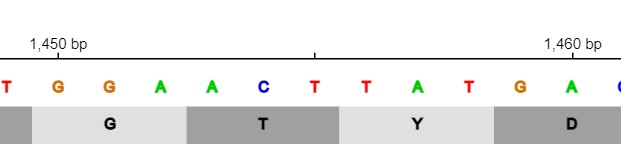

* If we look at the **307** base we will see that there is the first C in the CCG codon = P, proline, which is changing to T, resulting in TCG codon. In this case this is missence mutation, non-synonimous sunstitution, because (TCG) UCG codes serine. We can see that uncharged amno acid was substituted by another polar uncharged amino acid, so chemical properties of the radical did't change dramatically. However, polar charges of serine are more significant because of OH-group, so this substitution might affect some coordinating residues around this base.


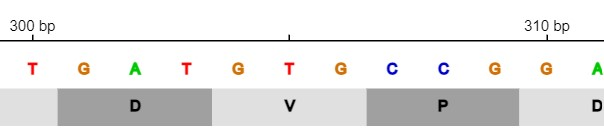

Common mutations between roommate's data and control samples:

In [ ]:
positions = []
for i in range(df_rmm.shape[0]):
    pos = df_rmm.iloc[i]["Position"]
    if pos in df58["Position"].to_list():
        positions.append(pos)
        print("match with _58 control:", df_rmm.iloc[[i]], df58.iloc[[i]], sep = "\n")
    elif pos in df59["Position"].to_list():
        positions.append(pos)
        print("match with _59 control:", df_rmm.iloc[[i]], df58.iloc[[i]], sep = "\n")
    elif pos in df60["Position"].to_list():
        positions.append(pos)
        print("match with _60 control:", df_rmm.iloc[[i]], df58.iloc[[i]], sep = "\n")

match with _58 control:
    Reference  Position Before After   Freq
0  KF848938.1        72      A     G  99.96
    Reference  Position Before After  Freq
0  KF848938.1        38      T     C  0.66
match with _58 control:
    Reference  Position Before After   Freq
1  KF848938.1       117      C     T  99.82
    Reference  Position Before After  Freq
1  KF848938.1        54      T     C   0.3
match with _58 control:
    Reference  Position Before After  Freq
2  KF848938.1       254      A     G  0.17
    Reference  Position Before After  Freq
2  KF848938.1        72      A     G   0.3
match with _58 control:
    Reference  Position Before After  Freq
3  KF848938.1       276      A     G  0.17
    Reference  Position Before After  Freq
3  KF848938.1        95      A     G  0.24
match with _58 control:
    Reference  Position Before After  Freq
5  KF848938.1       340      T     C  0.17
    Reference  Position Before After  Freq
5  KF848938.1       165      T     C  0.24
match with _58 c

In [ ]:
positions

[72,
 117,
 254,
 276,
 340,
 389,
 691,
 722,
 744,
 774,
 859,
 915,
 1043,
 1086,
 1213,
 1260,
 1280]

## 8. Epitope mapping

According to the paper, the the hemagglutinin H3 protein has five epitope regions (A–E):
* Epitope A (residues 122, 124, 126, 130–133, 135, 137, 138, 140, 142–146, 150, 152, 168)
* Epitope B (residues 128, 129, 155–160, 163, 165, 186–190, 192–194, 196–198)
* Epitope C (residues 44–48, 50, 51, 53, 54, 273, 275, 276, 278–280, 294, 297, 299, 300, 304, 305, 307–312)
* Epitope D (residues 96, 102, 103, 117, 121, 167, 170–177, 179, 182, 201, 203, 207–209, 212–219, 226–230, 238, 240, 242, 244, 246–248)
* Epitope E (residues 57, 59, 62, 63, 67, 75, 78, 80–83, 86–88, 91, 92, 94, 109, 260–262, 265)




Among positions with frequency more than avg+3std (1458, 307, 117, 999, 1260, 72, 774) only 307 is present in the epitope. This base is located in the epitope C, which is not the most dominant epitope. Nevertheless, perhaps that was the key-mutation for the virus to escape the vaccine antibodies that we used.